<a href="https://colab.research.google.com/github/Alecia113/NLP-Lab/blob/main/lab3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Example**实战了有点
#identifying animal species (features)

In [2]:
import torch
import numpy as np

two features: two aspects 
1: animal have hair
2: animal have feathers
has hair [011000]
has feather [001001]
----input ^
0-Oher 1-Manmmal 2-Bird [012002]
---output/y ^

# aim: predict animal == bird/ manmmal/others

In [ ]:
'''
创建数据one-hot
Create our feature data
[hair,feather]:0: X; 1:✅
[1,0]: animal has hair + doesn't have feathers
'''

'''
转换数据；变张量
transform data --> torch data type (Pytorch)
【传说中的如何让老师进行测试】
# Uncomment the following line to print out if you want to see the details
# print(x_data_torch)
'''

'''
好像是将输出的数据也录入了数组。
0-other； 1-mammal 2-bird
#然后再转换成张量
'''

'''
记录数据特征，和输出类的数量;;;就是赋值
'''
#这个部分更像是准备数据
#print()

In [3]:
#perpare for data
x_data = np.array(
    [[0,0],[1,0],[1,1],[0,0],[0,0],[0,1]])  #创建数据one-hot

x_data_torch = torch.from_numpy(x_data).float() #转类型变张量，目前还是整数

y_data = np.array([0,1,2,0,0,2]) #output
y_data_torch = torch.from_numpy(y_data) #output torch

num_features = 2 # 2个特征--hair, feather
num_classes = 3 # 3 输出类 other,mammal,bird

**No hidden layer --- manual 🤚 parameter update (weight + bias)** EG


In [ ]:
'''
调包
nn
和矩阵准确率分数
'''
'''
initialize weight + bias manually🤚 + setup gredient
torch.randn returns --->tensor (random fill with) (from normal distribution with mean 0 + vaiance方差 1)
[standard normal distribution 标准正态分布]
  # 功能：从标准正态分布（均值为0，方差为1）中抽取的一组随机数。返回一个张量
sizes (int…) - 整数序列，定义输出张量的形状
out (Tensor, optinal) - 结果张量

该方法能够决定自动梯度机制是否需要为当前这个张量计算记录运算操作.
该方法能对当前张量的requires_grad属性进行原地操作.返回这个当前张量.

'''
# Learning Rate - determines the step size at each iteration while moving toward a minimum of a loss function

# Epoch - A measure of the number of times all of the training vectors are used once to update the weights.
#方法训练向量的次数。（训练向量来每次更新权重）
#尝试2000看会发生什么

'''
for 循环开始正向传播 forward propagation   calculation+ storage of intermediate variables(incl. outputs)
from input layer --> output layer 

'''

'''
softmax change each value--->(0,1) + all values  +  add up(sum) = 1
eg:  [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
(l唠割锐泽母 log_softmax )

#啊哈！算法；
#算法图解
先进行softmax 然后进行logarithm softmax 对数
softmax： exp(x_i) / exp(x).sum() and log_softmax: log(exp(x_i)) /exp(x).sum() ) #只是分子做log
log(softmax(x)) 但是实际做起来 is different + efficient
    # https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax
    def log_softmax(input: Tensor, dim: Optional[int]=None, _stacklevel: 
      int=3, dtype: Optional[int]=None) ->Tensor
'''

#然后损失 开始要对比情况了。计算消极log 可能损失;[计算负对数似然损失]
'''
torch.nn.functional.nll_loss(input, target, weight=None, 
size_average=None, ignore_index=-100, reduce=None, reduction='mean')

一般只赋值前两个张量就可以了
'''

'''
开始反向传播：back propagation 进行计算梯度。 优化WB 使用学习率 -学习率*W/B 的梯度数据  然后再清零
torch.no_grad()
https://blog.csdn.net/weixin_46559271/article/details/105658654?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161629843016780357253890%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161629843016780357253890&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-1-105658654.first_rank_v2_pc_rank_v29&utm_term=torch.no_grad
当你做反向传播时，不要累积梯度。
'''

'''

argmax函数：torch.argmax(input, dim=None, keepdim=False)返回指定维度最大值的序号，dim给定的定义是：the demention to reduce.也就是把dim这个维度的，变成这个维度的最大值的index。

https://blog.csdn.net/weixin_42494287/article/details/92797061?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161630304416780269870820%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161630304416780269870820&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-1-92797061.first_rank_v2_pc_rank_v29&utm_term=torch.argmax做什么用的


In [65]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

W1 = torch.randn(num_features, num_classes, requires_grad=True)#torch.randn(2,3)
B1 = torch.randn(num_classes, requires_grad=True) #3

learning_rate = 0.01 

number_of_epochs = 2000

for epoch in range(number_of_epochs):

  z =torch.add(torch.matmul(x_data_torch, W1),B1) # 输入两个单词张量，和weight 和bias、 forward propagation；【其实感觉还是在整合数据】
  
  log_softmax = F.log_softmax(z,dim=1)  #nn.functional.log_softmax   【softmax--log】

  loss = F.nll_loss(log_softmax, y_data_torch)  # input target  ----loss【一个对数概率向量和一个目标标签】

  loss.backward() #calculate gradient
  with torch.no_grad():   #进入with 调用torch.no_grad 返回一个grad对象 torch.no_grad() 是一个上下文管理器，被该语句 wrap 起来的部分将不会track 梯度。
      W1.data -= learning_rate*W1.grad.data   #gradient descent
      B1.data -= learning_rate*B1.grad.data
  W1.grad.data.zero_() #reset gradient
  B1.grad.data.zero_()

  if epoch % 200 == 199:
    with torch.no_grad():        #预测不需要梯度的
        pred_outputs = torch.add(torch.matmul(x_data_torch ,W1),B1)  #重新开始做乘法，回到了最开始的时候。
        predicted = torch.argmax(pred_outputs, 1)  #不是.outputs 是——
        train_acc = accuracy_score(predicted.numpy(), y_data)
        print('Epoch:%d, loss: %.4f, train_acc:%.3f' %(epoch + 1, loss.item() , train_acc))

#result
print('Predicted :', predicted.numpy())
print('Truth :', y_data)
print('Accuracy : %.2f' %train_acc)


#训练准确度在增加，损失在降低
'''

Epoch:200, loss: 1.8851, train_acc:0.167
Epoch:400, loss: 1.1088, train_acc:0.833
Epoch:600, loss: 0.7822, train_acc:0.833
Epoch:800, loss: 0.6057, train_acc:1.000
Epoch:1000, loss: 0.4985, train_acc:1.000
Epoch:1200, loss: 0.4256, train_acc:1.000
Epoch:1400, loss: 0.3718, train_acc:1.000
Epoch:1600, loss: 0.3302, train_acc:1.000
Epoch:1800, loss: 0.2968, train_acc:1.000
Epoch:2000, loss: 0.2694, train_acc:1.000
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00[suji]

有hidden

Epoch: 200, loss: 0.9641, train_acc: 0.500
Epoch: 400, loss: 0.8275, train_acc: 0.667
Epoch: 600, loss: 0.7101, train_acc: 0.833
Epoch: 800, loss: 0.6079, train_acc: 0.833
Epoch: 1000, loss: 0.5234, train_acc: 0.833
Epoch: 1200, loss: 0.4527, train_acc: 0.833
Epoch: 1400, loss: 0.3903, train_acc: 0.833
Epoch: 1600, loss: 0.3342, train_acc: 1.000
Epoch: 1800, loss: 0.2883, train_acc: 1.000
Epoch: 2000, loss: 0.2466, train_acc: 1.000
Finished
Predicted ： [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00[suiji]

有优化没隐藏---训练的准确度能直接达到1 每次
200, loss: 1.039, train_acc: 1.000
400, loss: 0.837, train_acc: 1.000
600, loss: 0.702, train_acc: 1.000
800, loss: 0.602, train_acc: 1.000
1000, loss: 0.524, train_acc: 1.000
1200, loss: 0.462, train_acc: 1.000
1400, loss: 0.411, train_acc: 1.000
1600, loss: 0.368, train_acc: 1.000
1800, loss: 0.333, train_acc: 1.000
2000, loss: 0.303, train_acc: 1.000
Finished Training
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy :1.00


【2000，有隐藏层的优化】
200, loss: 0.9377, train_acc: 0.8333
400, loss: 0.7203, train_acc: 0.8333
600, loss: 0.5153, train_acc: 0.8333
800, loss: 0.3646, train_acc: 0.8333
1000, loss: 0.2612, train_acc: 1.0000
1200, loss: 0.1882, train_acc: 1.0000
1400, loss: 0.1382, train_acc: 1.0000
1600, loss: 0.1047, train_acc: 1.0000
1800, loss: 0.0822, train_acc: 1.0000
2000, loss: 0.0664, train_acc: 1.0000
Finished Training
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00


'''

Epoch:200, loss: 1.8851, train_acc:0.167
Epoch:400, loss: 1.1088, train_acc:0.833
Epoch:600, loss: 0.7822, train_acc:0.833
Epoch:800, loss: 0.6057, train_acc:1.000
Epoch:1000, loss: 0.4985, train_acc:1.000
Epoch:1200, loss: 0.4256, train_acc:1.000
Epoch:1400, loss: 0.3718, train_acc:1.000
Epoch:1600, loss: 0.3302, train_acc:1.000
Epoch:1800, loss: 0.2968, train_acc:1.000
Epoch:2000, loss: 0.2694, train_acc:1.000
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00


# 换了顺序： Hidden layer + manual parameter update  有H + 🤚

In [ ]:
'''
in hidden layer neurons numbers
定义隐藏层的神经元 

input features, output neurons(in hidden layer)(numbers)--W1

B1=== let Bias(hidden layer) output candidates numbers.  (neurons in hidden layer 5)

wout input （neurons numbers [hidden], output(classes))

'''
#定义神经元构建WB 从单词到隐藏层神经元。   b 让b输出日志数量（神经元）【这地方不理解】 
#w out 从中间到边上，输出大类。   Bout = 设置bias 为输出候选数。即3（类数）
#设置学习率 和 周期
'''
然后开始进行内部的。从添加。
F.relu 激活函数。然后进行激活函数
然后进行softmax log 然后 import torch.nn.functional as F
fit函数中采用损失函数F.nll_loss()
NLLLoss 的 输入 是一个对数概率向量和一个目标标签. 它不会为我们计算对数概率. 适合网络的最后一层是log_softmax
----^还在准备数据
'''
#激活函数准备输出的做分析的数据；；；对数softmax
#损失loss，   反向传播损失
#反向传播损失
#然后学习率训练数据，（调学习率） 每次处理完都要清除数据zero

In [17]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

n_hidden_1 = 5 #隐藏层中的神经元

W1 = torch.randn(num_features, n_hidden_1, requires_grad=True) #输入特征，输出（隐藏侧神经元数量）
B1 = torch.randn(n_hidden_1, requires_grad=True) # 让隐藏层；偏移输出 候选日期的数量。即5 隐藏层中的神经元数量
# w1 （ ……num_features， num_classes， requ）
#Bout = 没隐藏的b
Wout = torch.rand(n_hidden_1, num_classes, requires_grad=True)#输入神经元数，输出类

Bout = torch.randn(num_classes, requires_grad=True)  #输出类3

learning_rate=0.01 #没变
no_of_epochs = 2000 # nob

for epoch in range(no_of_epochs):
  z1 = torch.add(torch.matmul(x_data_torch, W1), B1) # no 变
  Zout = torch.add(torch.matmul(F.relu(z1), Wout), Bout) #  激活函数的加和

  log_softmax = F.log_softmax(Zout,dim=1) #no大变
  loss = F.nll_loss(log_softmax, y_data_torch) #no大变

  loss.backward()#nb
  with torch.no_grad():#nb
    W1.data -= learning_rate*W1.grad.data#nb
    B1.data -= learning_rate*B1.grad.data#nb
    
    Wout.data -= learning_rate*Wout.grad.data  #bian
    Bout.data -= learning_rate*Bout.grad.data  #b

  W1.grad.data.zero_()#nb
  B1.grad.data.zero_()#nb
  Wout.grad.data.zero_()#b
  Bout.grad.data.zero_()#b


  if epoch % 200 == 199:#nd
    with torch.no_grad():#nd
      z1 = torch.add(torch.matmul(x_data_torch ,W1),B1) #nd
      Zout = torch.add(torch.matmul(F.relu(z1),Wout),Bout)#d
      predicted = torch.argmax(Zout,1)#lued
      train_acc = accuracy_score(predicted.numpy(),y_data)#nd
      print('Epoch: %d, loss: %.4f, train_acc: %.3f' %(epoch +1, loss.item() , train_acc))
#nd
print("Finished") #分隔

#result
print('Predicted ：', predicted.numpy()) #Predicted ： [0 1 2 0 0 2]
print('Truth :', y_data)#Trure ： [0 1 2 0 0 2]
print('Accuracy : %.2f' %train_acc) #Accuracy :









Epoch: 200, loss: 0.9641, train_acc: 0.500
Epoch: 400, loss: 0.8275, train_acc: 0.667
Epoch: 600, loss: 0.7101, train_acc: 0.833
Epoch: 800, loss: 0.6079, train_acc: 0.833
Epoch: 1000, loss: 0.5234, train_acc: 0.833
Epoch: 1200, loss: 0.4527, train_acc: 0.833
Epoch: 1400, loss: 0.3903, train_acc: 0.833
Epoch: 1600, loss: 0.3342, train_acc: 1.000
Epoch: 1800, loss: 0.2883, train_acc: 1.000
Epoch: 2000, loss: 0.2466, train_acc: 1.000
Finished
Predicted ： [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00


# **No hidden layer --- Optimiser** 优化器没有隐藏层

In [23]:
#调包多调了个优化器
'''
build model (a neural network） ✅  --- initializing （parameters manually) X
torch.nn.Linear 这个是做什么的： linear transformation (input data) ---- y=Ax+b
这里是A的转置貌似AT
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

correspond  
 英  [ˌkɒrəˈspɒnd]   美  [ˌkɔːrəˈspɑːnd]

vi. 符合，一致；相应；通信

#perpare for data
x_data = np.array(
    [[0,0],[1,0],[1,1],[0,0],[0,0],[0,1]])  #创建数据one-hot

x_data_torch = torch.from_numpy(x_data).float() #转类型变张量，目前还是整数

y_data = np.array([0,1,2,0,0,2]) #output
y_data_torch = torch.from_numpy(y_data) #output torch

num_features = 2 # 2个特征--hair, feather
num_classes = 3 # 3 输出类 other,mammal,bird

'''
#定义大类。然后大类的inint中是使用nn线性回归然后做了个线性化。 （向前传播） 然后再做了个向前传播的函数，定义了变量x。【可能是输入的one-hot
# 初始化模型 initialize the model
# 学习率
#计算损失 -----计算负对数似然损失
#优化器     【1 定义优化器--2 传递模型参数来进行更新。+ 调用optim.SGD时设置的学习率 3 使用的是SGD 优化器https://pytorch.org/docs/stable/optim.html
# 定义时期（纪元）
'''你在想什么落了优化器还有其他的几步……'''
#修改权重。（用给定的学习率）每个阶段   1 初始化[获得input 和标签==output] 2train mode[模式】（net.train(mode = True) or evaluation (评估) mode (when net.train(mode = False)/ net.eval())
'''
初始化投入数据——>>训练评估模式
一个模块可以设置为训练模式net.train mode = True； 评估模式 net.train中 mode 评估=false 或net.eval()
仅对certain modules (Dropout, BtchNorm等)有效； 仅对某些模块有效
'''
#设置梯度为0 
#输出   ： 向前传播+向后传播+ 优化
'''
output(model-inputs) --- loss(softmax) ---backward---optimiser
'''
#开始按照时期准备输出数据了
'''
1预测： model.eval
2 outputs
3 预测 ： 用2的数据进行argmax  从2的数据中，找出dim = 1 ：1维度最大的值的index
4  准确率 accuracy_score
'''

'\noutput(model-inputs) --- loss(softmax) ---backward---optimiser\n'

In [47]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #bt
from sklearn.metrics import accuracy_score

class ModelWithoutHiddenLayer(nn.Module):
  def __init__(self, input_size, output_size):
    super(ModelWithoutHiddenLayer, self).__init__()  #必须有的你忘了
    #AttributeError: cannot assign module before Module.__init__() call  没有.__init__() 就没办法调用模块
    self.linear = nn.Linear(input_size, output_size) # corresponds 对应 W1,B1 (是不是就是W1，B1)
  
  def forward(self, x):         #就是做线性回归的函数
    x = self.linear(x)
    return x    #没返回x
  
model = ModelWithoutHiddenLayer(num_features, num_classes) # 初始化模型
learning_rate = 0.01
criterion = nn.NLLLoss() # 计算负对数似然损失 calculate negatice log likelihood loss

optimiser = optim.SGD(model.parameters(), lr=learning_rate) # 定义优化器

no_of_epochs = 2000 #epochs

for epoch in range(no_of_epochs): #for every epoch, the model weights will be modified using the given learning rate
  inputs = x_data_torch
  labels = y_data_torch

  model.train()  # mode = True (default 默认)
  optimiser.zero_grad() 

# forward + backward + optimize
  outputs = model(inputs) 
  loss = criterion(F.log_softmax(outputs,dim=1), labels) # 准则
  loss.backward()
  optimiser.step()

  if epoch % 200 == 199: # 打印200时期
    model.eval() #predict( set the module to evaluation mode)
    pre_outputs = model(inputs)
    predicted = torch.argmax(pred_outputs, 1)
    train_acc = accuracy_score(predicted.numpy(),y_data)
    print('%d, loss: %.3f, train_acc: %.3f' %(epoch + 1, loss.item(),train_acc))

print('Finished Training')

#result
model.eval()
pred_outputs = model(inputs)
predicted = torch.argmax(pred_outputs, 1)
print('Predicted :', predicted.numpy())
print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_data)
print('Accuracy :%.2f' %train_acc)

200, loss: 0.955, train_acc: 1.000
400, loss: 0.782, train_acc: 1.000
600, loss: 0.660, train_acc: 1.000
800, loss: 0.568, train_acc: 1.000
1000, loss: 0.496, train_acc: 1.000
1200, loss: 0.438, train_acc: 1.000
1400, loss: 0.391, train_acc: 1.000
1600, loss: 0.352, train_acc: 1.000
1800, loss: 0.319, train_acc: 1.000
2000, loss: 0.291, train_acc: 1.000
Finished Training
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy :1.00


#**Hidden Layer with the optimiser**   优化器的隐藏层

In [ ]:
#调包
#定义类
'''
多定义了一层 是把input output  中间加了一个hidden层
这样就变成了 input hidd   hidd outp

'''
#定义函数向前传播
'''
多个激活函数要激活一下z1 然后放到Zout
'''

#模型调用值。input： 特点总数； 一个隐藏层； output： 类数
#学习率
#定义时期
#损失函数  ：要进行softmax 只不过这里换了个方法
'''
Pythorch's CrossEntropyLoss ————》criterion准则
same result -- Pytorch's  NLLLoss -->LogSoftmax layer add after output layer(original)
'''
#优化器
#导入skl-准确率分数的包
# 多次循环数据集
'''
传递数据和标签 
训练模型
清空优化梯度
输出训练后数据
损失
反向传播
优化器（多次重新计算）
'''
#开始进行200打一次数据打一次损失和 训练准确度
'''
这里4句看起来都是在为训练准确度这个结果服务的
'''

#然后输出结果。
'''
预测真实和准确率
以及怎么去实现的准备情况。
'''
'''
【1000预测的九不准了】
200, loss: 0.9767, train_acc: 0.5000
400, loss: 0.8606, train_acc: 0.5000
600, loss: 0.7692, train_acc: 0.8333
800, loss: 0.6840, train_acc: 0.8333
1000, loss: 0.6091, train_acc: 0.8333
Finished Training
Predicted : [0 0 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 0.83

【2000，有隐藏层的优化】
200, loss: 0.9377, train_acc: 0.8333
400, loss: 0.7203, train_acc: 0.8333
600, loss: 0.5153, train_acc: 0.8333
800, loss: 0.3646, train_acc: 0.8333
1000, loss: 0.2612, train_acc: 1.0000
1200, loss: 0.1882, train_acc: 1.0000
1400, loss: 0.1382, train_acc: 1.0000
1600, loss: 0.1047, train_acc: 1.0000
1800, loss: 0.0822, train_acc: 1.0000
2000, loss: 0.0664, train_acc: 1.0000
Finished Training
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00

'''

In [67]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
n_hidden_1 = 5   #老师没这部
class ModelWithHiddenLayer(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ModelWithHiddenLayer, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)    #b
    self.linear2 = nn.Linear(hidden_size, output_size)  #b

  def forward(self, x):
    z1 = self.linear1(x)
    Zout = self.linear2(F.relu(z1))  #b
    return Zout

model = ModelWithHiddenLayer(num_features, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs= 2000

criterion = nn.CrossEntropyLoss()  # == criterion = nn.NLLLoss()  ##b
optimiser = optim.SGD(model.parameters(), lr=learning_rate) 

from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs): #loop dataset multiple times
  #get inputs
  inputs = x_data_torch
  labels = y_data_torch

  model.train()
  # zero parameter gradients
  optimiser.zero_grad()
  # forward + backward+ optimize
  outputs = model(inputs)
  loss = criterion(outputs, labels) # don't need to calcualte logsoftmax here
  loss.backward()
  optimiser.step()

  # print statistics
  if epoch % 200 == 199:    # print 每200 epochs
    model.eval()
    pred_outputs = model(inputs)
    predicted = torch.argmax(pred_outputs, 1)
    train_acc = accuracy_score(predicted.numpy(),y_data)
    print('%d, loss: %.4f, train_acc: %.4f' %(epoch+1, loss.item(), train_acc))

print('Finished Training')

#Result
pred_outputs = model(inputs)
_,predicted = torch.max(pred_outputs, 1)
print('Predicted :', predicted.numpy())
print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_data)
print('Accuracy : %.2f'%train_acc)



200, loss: 0.9377, train_acc: 0.8333
400, loss: 0.7203, train_acc: 0.8333
600, loss: 0.5153, train_acc: 0.8333
800, loss: 0.3646, train_acc: 0.8333
1000, loss: 0.2612, train_acc: 1.0000
1200, loss: 0.1882, train_acc: 1.0000
1400, loss: 0.1382, train_acc: 1.0000
1600, loss: 0.1047, train_acc: 1.0000
1800, loss: 0.0822, train_acc: 1.0000
2000, loss: 0.0664, train_acc: 1.0000
Finished Training
Predicted : [0 1 2 0 0 2]
Truth : [0 1 2 0 0 2]
Accuracy : 1.00


# **Word2Vec on Pytorch** 做个WordVec-Skip Gram 在Neural Network (NN 通过pytorch）


In [4]:
# 原始数据----套数 步型 Raw data - setences 
#[创建数据] 为了简单我们创建一个玩具数据 create toy data simplicity
#【转换形式】将所有的句子转变成单词列表 convert 转变 split 分开 #把每个单词拆出来
# 【每个词的词频】每个单词出现多少次
'''
在同时需要index和value值的时候可以使用 enumerate。
1.有一 list= [1, 2, 3, 4, 5, 6]  
请打印输出：
0, 1 
1, 2 
2, 3 
3, 4 
4, 5 
5, 6 

list=[1,2,3,4,5,6]
 
for i ,j in enumerate(list)
 
　　print(i,j)


word_to_idx = {w:i for i, w in enumerate(unique_vocab)}
#给unique_vocab中的词加一个序号标签:
    格式为w(词)：i(序号) 
    进行循环将词和序号取出来：for i, w(enumerate中的两个变量) in enumerate()

#https://blog.csdn.net/weixin_40952784/article/details/90693555?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161641229716780266234301%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161641229716780266234301&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-2-90693555.first_rank_v2_pc_rank_v29&utm_term=%7Bw%3A+i+for+i%2C+w+in+enumerate%28word_list%29%7D+


window size = 1 for skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
#https://blog.csdn.net/weixin_41843918/article/details/90312339?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161641162716780357265067%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161641162716780357265067&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-1-90312339.first_rank_v2_pc_rank_v29&utm_term=skip-gram+
跳表
'''
#初始化 skip_grams : 开始跳表
#开始作循环  在做window 和跳步
#取两边的内容然后有点迭代的意思 感觉就是整个skip_grams 方法



'\n在同时需要index和value值的时候可以使用 enumerate。\n1.有一 list= [1, 2, 3, 4, 5, 6]  \n请打印输出：\n0, 1 \n1, 2 \n2, 3 \n3, 4 \n4, 5 \n5, 6 \n\nlist=[1,2,3,4,5,6]\n \nfor i ,j in enumerate(list)\n \n\u3000\u3000print(i,j)\n\n\nword_to_idx = {w:i for i, w in enumerate(unique_vocab)}\n#给unique_vocab中的词加一个序号标签:\n    格式为w(词)：i(序号) \n    进行循环将词和序号取出来：for i, w(enumerate中的两个变量) in enumerate()\n\n#https://blog.csdn.net/weixin_40952784/article/details/90693555?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161641229716780266234301%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161641229716780266234301&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-2-90693555.first_rank_v2_pc_rank_v29&utm_term=%7Bw%3A+i+for+i%2C+w+in+enumerate%28word_list%29%7D+\n\n\nwindow size = 1 for skip-gram\n# i.e.) he likes cat\n#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])\n#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)\n#https:

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

word_list = " ".join(sentences).split()   #把每个单词拆出来
word_list = list(set(word_list))   #把重复的单词都去掉，每个单词都取一个

word_dict = {w: i for i, w in enumerate(word_list)} # enumerate  （因·妞·摸·锐·忒）列举，枚举，计算。#取的不是个数么？怎么取得是序号ß
skip_grams = []

# make window size=1 for skip-gram

for sentence in sentences:
  sentence = sentence.split()       #['cat', 'dislikes', 'dog']
  for i in range(len(sentence)):      #3
    centre = word_dict[sentence[i]]     #5
    if i > 0 and i < len(sentence)-1:
      context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]  #[11, 5]
    elif i ==0:
      context = [word_dict[sentence[i + 1]]]
    else:
      context = [word_dict[sentence[i - 1]]]

    # skipgrams - (centre, context[0]), (centre, context[1])..
    for w in context:
      skip_grams.append([centre, w])

    print(skip_grams)#自加



[[1, 12]]
[[1, 12], [12, 1], [12, 9]]
[[1, 12], [12, 1], [12, 9], [9, 12]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12], [12, 1], [12, 7]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12], [12, 1], [12, 7], [7, 12]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12], [12, 1], [12, 7], [7, 12], [4, 9]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12], [12, 1], [12, 7], [7, 12], [4, 9], [9, 4], [9, 7]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 4], [4, 12], [1, 12], [12, 1], [12, 7], [7, 12], [4, 9], [9, 4], [9, 7], [7, 9]]
[[1, 12], [12, 1], [12, 9], [9, 12], [1, 12], [12, 1], [12, 

In [ ]:
# 不重复的单词数量；大小
# 分批准备 batch（拜吃） prepare 
'''
输入+ 标签
初始化这13个词，让他们都是0
然后one-hot input
获得中心词    添加它进入到input 
获得内容词
#np.array(inputs), np.array(labels) 传参
'''



In [6]:
voc_size = len(word_list)       # 不重复的单词一共13; 13

def prepare_batch(data_temp):
  inputs = []
  labels = []

  for i in range(len(data_temp)):
    input_temp = [0]*voc_size     #让这13个不同的单词位置上都是0;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]s
    input_temp[data_temp[i][0]] = 1   # one-hot input 【？？】是指【input】【labels】么？
    inputs.append(input_temp)   # centre
    labels.append(data_temp[i][1])  #context word

  return np.array(inputs), np.array(labels)




In [ ]:
# 调包
# 批量的大小
#学习率
#时期
#W权重  
# （（（改组训练集以每个纪元的步长不同；也可以跳过此步 ）））嵌入大小 #shuffle 洗牌
'''
……
[[8, 12], [12, 11], [9, 5], [10, 12], [12, 11], [9, 10], [9, 5], [10, 12], [9, 7], [11, 12], [7, 9], [12, 1], [11, 12], [12, 11], [12, 8], [10, 12], [5, 11], [12, 0], [2, 12], [11, 2], [4, 12], [8, 12], [12, 10], [12, 5], [1, 12], [12, 5], [12, 8], [3, 12], [12, 6], [12, 0], [2, 11], [12, 4], [6, 12], [12, 3], [5, 12], [9, 5], [5, 12], [0, 12], [10, 9], [11, 12], [12, 5], [12, 7], [11, 5], [0, 12], [12, 3], [12, 11], [7, 12], [12, 8], [8, 12], [8, 12], [12, 2], [8, 12], [3, 12], [5, 12], [11, 9], [11, 12], [5, 9], [12, 8], [12, 10], [5, 9], [12, 8], [9, 11], [12, 10], [5, 9]]
[[2, 11], [12, 11], [11, 2], [9, 5], [9, 11], [1, 12], [5, 9], [10, 12], [3, 12], [5, 12], [12, 10], [5, 9], [7, 9], [12, 10], [10, 12], [8, 12], [12, 0], [12, 1], [12, 11], [12, 2], [12, 8], [12, 8], [10, 9], [9, 10], [12, 8], [12, 5], [10, 12], [8, 12], [0, 12], [11, 5], [12, 8], [12, 11], [12, 5], [12, 3], [8, 12], [9, 7], [8, 12], [12, 7], [9, 5], [11, 12], [6, 12], [5, 11], [12, 6], [0, 12], [12, 3], [5, 12], [12, 4], [12, 0], [12, 5], [12, 10], [2, 12], [5, 9], [8, 12], [11, 12], [9, 5], [12, 11], [11, 12], [4, 12], [7, 12], [11, 9], [11, 12], [5, 12], [12, 8], [3, 12]]
[[8, 12], [9, 5], [12, 11], [11, 12], [3, 12], [4, 12], [11, 9], [10, 12], [12, 5], [11, 12], [12, 8], [12, 11], [5, 9], [12, 8], [12, 10], [0, 12], [8, 12], [12, 8], [9, 10], [9, 5], [8, 12], [12, 6], [12, 5], [2, 11], [12, 10], [10, 9], [1, 12], [11, 2], [12, 8], [5, 12], [5, 9], [3, 12], [8, 12], [5, 12], [11, 12], [12, 2], [5, 9], [12, 10], [11, 12], [6, 12], [12, 1], [9, 5], [12, 7], [9, 7], [2, 12], [12, 0], [11, 5], [10, 12], [12, 8], [7, 12], [5, 11], [12, 0], [9, 11], [5, 12], [8, 12], [10, 12], [0, 12], [7, 9], [12, 3], [12, 5], [12, 4], [12, 11], [12, 3], [12, 11]]
[[12, 10], [12, 8], [12, 8], [12, 11], [7, 12], [5, 9], [11, 5], [5, 11], [4, 12], [10, 9], [9, 10], [12, 11], [12, 4], [5, 12], [12, 11], [11, 12], [12, 0], [9, 5], [3, 12], [10, 12], [8, 12], [11, 12], [5, 9], [12, 1], [12, 10], [12, 8], [3, 12], [8, 12], [12, 8], [12, 6], [8, 12], [0, 12], [12, 3], [11, 2], [7, 9], [12, 11], [10, 12], [12, 7], [12, 2], [1, 12], [0, 12], [9, 7], [10, 12], [11, 12], [12, 5], [6, 12], [9, 5], [9, 11], [2, 12], [5, 12], [11, 12], [8, 12], [12, 5], [2, 11], [12, 3], [5, 12], [8, 12], [12, 5], [12, 10], [12, 0], [11, 9], [12, 8], [5, 9], [9, 5]]
[[5, 9], [10, 12], [5, 12], [9, 10], [11, 12], [12, 1], [12, 11], [12, 3], [3, 12], [1, 12], [9, 5], [7, 9], [9, 11], [12, 4], [12, 5], [12, 10], [12, 7], [10, 12], [6, 12], [5, 11], [12, 3], [12, 11], [12, 2], [12, 8], [2, 11], [9, 7], [8, 12], [11, 5], [5, 12], [5, 9], [12, 0], [11, 12], [12, 10], [0, 12], [12, 0], [10, 9], [12, 6], [12, 8], [11, 12], [7, 12], [3, 12], [12, 8], [11, 2], [12, 11], [4, 12], [12, 10], [12, 8], [9, 5], [2, 12], [8, 12], [10, 12], [12, 5], [12, 5], [5, 12], [5, 9], [8, 12], [0, 12], [11, 12], [8, 12], [12, 8], [8, 12], [12, 11], [11, 9], [9, 5]]
[[8, 12], [11, 9], [1, 12], [7, 9], [12, 0], [0, 12], [12, 5], [12, 0], [12, 10], [12, 2], [12, 10], [5, 9], [5, 11], [11, 12], [5, 9], [3, 12], [8, 12], [12, 4], [12, 8], [5, 12], [12, 7], [12, 3], [8, 12], [11, 12], [6, 12], [5, 12], [12, 11], [12, 8], [3, 12], [10, 12], [10, 9], [2, 12], [12, 1], [7, 12], [9, 5], [12, 3], [9, 7], [11, 12], [5, 9], [12, 5], [11, 5], [2, 11], [12, 8], [12, 8], [8, 12], [12, 10], [10, 12], [12, 5], [12, 11], [5, 12], [8, 12], [9, 10], [11, 12], [4, 12], [12, 11], [10, 12], [9, 5], [11, 2], [12, 11], [12, 8], [9, 5], [0, 12], [12, 6], [9, 11]]
[[5, 12], [2, 11], [11, 5], [3, 12], [5, 12], [11, 9], [12, 3], [12, 11], [11, 12], [8, 12], [5, 12], [12, 4], [11, 12], [9, 10], [12, 0], [9, 5], [9, 7], [12, 11], [5, 9], [8, 12], [10, 12], [10, 12], [5, 11], [8, 12], [9, 5], [9, 11], [10, 9], [0, 12], [1, 12], [12, 7], [12, 2], [7, 12], [12, 10], [5, 9], [7, 9], [12, 8], [5, 9], [12, 8], [11, 12], [6, 12], [12, 6], [12, 5], [12, 10], [4, 12], [12, 11], [10, 12], [11, 12], [12, 10], [12, 5], [0, 12], [9, 5], [12, 8], [3, 12], [12, 8], [8, 12], [12, 0], [12, 8], [12, 3], [11, 2], [12, 1], [12, 11], [8, 12], [12, 5], [2, 12]]
[[12, 3], [10, 12], [12, 5], [12, 8], [11, 12], [0, 12], [8, 12], [12, 10], [0, 12], [12, 5], [9, 10], [8, 12], [5, 12], [11, 2], [3, 12], [5, 11], [10, 12], [5, 9], [5, 12], [12, 11], [11, 12], [2, 11], [1, 12], [8, 12], [4, 12], [5, 9], [3, 12], [12, 8], [11, 5], [12, 11], [5, 12], [11, 12], [9, 5], [12, 0], [12, 7], [12, 5], [8, 12], [12, 2], [12, 11], [9, 5], [2, 12], [7, 12], [12, 1], [12, 8], [5, 9], [12, 4], [12, 0], [7, 9], [10, 9], [12, 10], [12, 3], [12, 11], [11, 12], [6, 12], [9, 11], [12, 8], [8, 12], [9, 7], [9, 5], [12, 10], [12, 6], [10, 12], [12, 8], [11, 9]]
[[12, 8], [2, 12], [4, 12], [12, 10], [12, 4], [9, 5], [1, 12], [0, 12], [9, 5], [2, 11], [11, 2], [11, 12], [11, 9], [12, 10], [10, 12], [12, 5], [5, 9], [12, 5], [9, 5], [12, 11], [3, 12], [12, 0], [9, 10], [12, 11], [10, 12], [12, 10], [5, 9], [12, 11], [10, 12], [10, 9], [11, 12], [9, 11], [5, 11], [9, 7], [3, 12], [7, 9], [12, 7], [8, 12], [8, 12], [8, 12], [12, 3], [12, 2], [12, 8], [11, 12], [12, 8], [6, 12], [8, 12], [12, 5], [12, 8], [12, 0], [0, 12], [11, 12], [5, 12], [12, 3], [12, 11], [5, 12], [12, 1], [11, 5], [5, 12], [12, 6], [7, 12], [8, 12], [5, 9], [12, 8]]
[[5, 12], [12, 1], [12, 8], [0, 12], [12, 8], [11, 12], [9, 5], [11, 12], [12, 10], [12, 3], [9, 5], [9, 11], [12, 3], [12, 10], [11, 9], [11, 5], [12, 5], [8, 12], [11, 12], [8, 12], [11, 2], [5, 9], [12, 11], [12, 5], [10, 12], [10, 12], [12, 11], [10, 12], [12, 11], [12, 0], [5, 11], [12, 0], [1, 12], [12, 2], [12, 4], [11, 12], [8, 12], [6, 12], [5, 9], [12, 8], [12, 8], [10, 9], [3, 12], [2, 12], [3, 12], [0, 12], [9, 10], [5, 9], [12, 5], [7, 9], [12, 7], [8, 12], [5, 12], [9, 5], [8, 12], [7, 12], [12, 11], [12, 10], [9, 7], [5, 12], [12, 8], [4, 12], [12, 6], [2, 11]]
[[12, 8], [7, 9], [12, 6], [9, 5], [11, 5], [8, 12], [12, 11], [1, 12], [10, 12], [12, 1], [12, 7], [12, 10], [11, 12], [12, 2], [7, 12], [2, 12], [6, 12], [3, 12], [10, 12], [9, 5], [4, 12], [5, 9], [12, 0], [0, 12], [9, 11], [9, 7], [11, 12], [8, 12], [12, 5], [12, 10], [0, 12], [12, 11], [12, 4], [2, 11], [8, 12], [5, 11], [11, 9], [12, 0], [10, 9], [3, 12], [12, 5], [12, 8], [5, 9], [12, 11], [11, 2], [9, 10], [8, 12], [12, 10], [5, 12], [10, 12], [8, 12], [12, 8], [12, 8], [12, 11], [12, 3], [11, 12], [12, 8], [11, 12], [5, 9], [5, 12], [12, 5], [5, 12], [9, 5], [12, 3]]
[[8, 12]……
''''
# 每个时期中还有个for循环
#
'''
min(iterable, *[, default=obj, key=func]) -> value
min(arg1, arg2, *args, *[, key=func]) -> value
'''
#sotmax
#backward
# grad 优化学习率
#清零 
#损失的和


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from random import shuffle

batch_size = 16
learning_rate = 0.1
embedding_size = 2
no_of_epochs = 5000

W1 = torch.randn(voc_size, embedding_size, requires_grad = True)  #还是随机生成
Wout = torch.randn(embedding_size, voc_size, requires_grad=True)  #还是随机生成

for epoch in range(no_of_epochs):
  shuffle(skip_grams) #非必须
  loss_sum = 0  #非必须

  for ind in range(0,len(skip_grams),batch_size):
    data_temp = skip_grams[ind: min(ind+batch_size, len(skip_grams))]
    inputs_temp, labels_temp = prepare_batch(data_temp)

    inputs_torch = torch.from_numpy(inputs_temp).float()
    labels_torch = torch.from_numpy(labels_temp)  #把数组转成张量

    hidden = torch.matmul(inputs_torch,W1)
    out = torch.matmul(hidden,Wout)

    log_softmax = F.log_softmax(out,dim=1) #(out,dim=1)落东西了
    loss = F.nll_loss(log_softmax, labels_torch)

    loss.backward()
    with torch.no_grad():
      W1.data -= learning_rate*W1.grad.data
      Wout.data -= learning_rate*Wout.grad.data
    W1.grad.data.zero_()
    Wout.grad.data.zero_()

    loss_sum += loss.item()

  if epoch % 500 == 499:
    print('Epoch: %d, loss: %.4f' %(epoch +1 , loss_sum))


#各种打错
#每次的loss都不一样



Epoch: 500, loss: 5.5416
Epoch: 1000, loss: 5.4724
Epoch: 1500, loss: 5.4745
Epoch: 2000, loss: 5.4853
Epoch: 2500, loss: 5.4475
Epoch: 3000, loss: 5.4644
Epoch: 3500, loss: 5.4341
Epoch: 4000, loss: 5.4635
Epoch: 4500, loss: 5.4508
Epoch: 5000, loss: 5.4336


In [ ]:
#开始画图了
# 训练项目的矩阵 trained projection matrix
# 展示结果： visualise result
'''
music  :  -1.3878884   -1.8022736
he  :  -2.02521   -2.2214017
movie  :  -1.9006809   -1.8585931
milk  :  -2.1212428   -1.844412
dog  :  -4.4536195   1.7848995
she  :  -3.3582401   0.76418185
dislikes  :  1.0747278   3.2702248
animal  :  -3.2835643   1.4837306
game  :  -1.6515896   -1.6677575
cat  :  -0.86365926   0.04981913
fish  :  -3.5263453   1.1476285
bone  :  -1.279518   -1.8656741
likes  :  0.4594769   0.7045842
'''


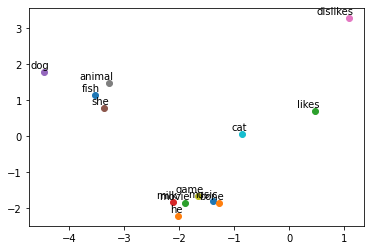

In [38]:
trained_embeddings = W1.data.numpy()

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',ha= 'right',va='bottom')  #textcoords:名字又分到各自的点上了，有些点的名字改善了，能看清了
          #ha 名字在点的左上方 va 没看出来有什么变化

plt.show()

#**TEST**

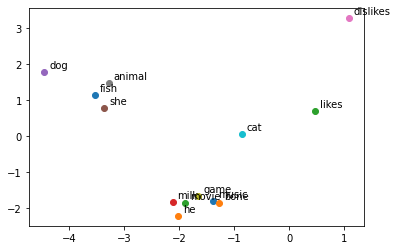

In [37]:
#9.9

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',va= 'bottom')

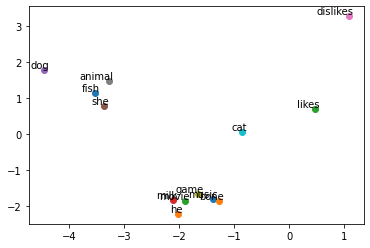

In [35]:
#9.8

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',ha= 'right')

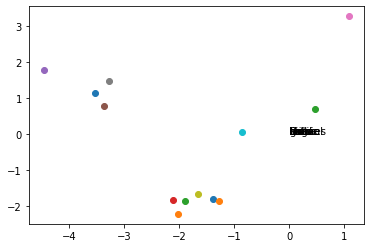

In [31]:
#9.7
for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(0,0))  #只有前两个名字都凑到一起了，就在点附近
   

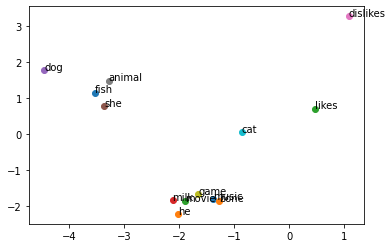

In [27]:
#9.6
for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y))

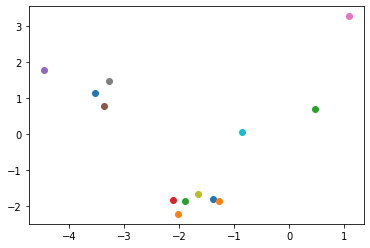

In [23]:
#9.5
for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y) #所有数据

In [16]:
#9.4
word_list

['music',
 'he',
 'movie',
 'milk',
 'dog',
 'she',
 'dislikes',
 'animal',
 'game',
 'cat',
 'fish',
 'bone',
 'likes']

In [15]:
#9.3
x,y

(0.4594769, 0.7045842)

In [14]:
#9.2
y

0.7045842

In [13]:
#9.1
x

0.4594769

In [10]:
#9.0
trained_embeddings

array([[-1.3878884 , -1.8022736 ],
       [-2.02521   , -2.2214017 ],
       [-1.9006809 , -1.8585931 ],
       [-2.1212428 , -1.844412  ],
       [-4.4536195 ,  1.7848995 ],
       [-3.3582401 ,  0.76418185],
       [ 1.0747278 ,  3.2702248 ],
       [-3.2835643 ,  1.4837306 ],
       [-1.6515896 , -1.6677575 ],
       [-0.86365926,  0.04981913],
       [-3.5263453 ,  1.1476285 ],
       [-1.279518  , -1.8656741 ],
       [ 0.4594769 ,  0.7045842 ]], dtype=float32)

In [77]:
#8.0
out

tensor([[ 7.5332e-01, -6.2606e-01, -6.5686e-01,  1.0695e+00,  2.0570e-01,
          1.6159e+00,  9.9116e-01, -4.7721e-01, -4.8659e-01,  2.4906e-01,
         -9.5885e-01, -2.2234e-03, -4.2856e-01],
        [-1.5327e+00,  3.2539e-02, -1.5283e+00,  3.9316e-01, -1.1887e+00,
          3.8653e-01, -1.2951e+00, -1.7716e-01, -3.1022e-01, -8.4771e-02,
          1.1408e+00,  6.5776e-01,  3.0735e-01],
        [ 5.0555e+00, -7.7394e-01,  3.5022e+00,  8.3063e-02,  3.5071e+00,
          6.9841e-01,  4.6591e+00, -3.2242e-02,  3.2490e-01,  5.0622e-01,
         -4.1978e+00, -1.8187e+00, -1.3169e+00],
        [ 4.4253e+00, -1.1316e+00,  2.0176e+00,  1.0127e+00,  2.7882e+00,
          1.9556e+00,  4.3423e+00, -4.4826e-01, -1.9130e-01,  5.9750e-01,
         -3.9710e+00, -1.3530e+00, -1.3594e+00],
        [-6.5855e-01, -7.1827e-01, -2.3466e+00,  1.6846e+00, -9.6507e-01,
          2.3337e+00, -1.3078e-01, -7.5341e-01, -9.0033e-01,  2.1251e-01,
          1.2266e-02,  6.6796e-01, -2.0103e-01],
        [-3.338

In [75]:
#7.9
torch.matmul(inputs_torch,W1)

tensor([[-0.1217,  0.6713],
        [ 0.1553, -0.0029],
        [ 0.0227, -0.7057],
        [ 0.8917,  2.1404],
        [-0.0432,  0.0333],
        [-0.2686,  0.3370],
        [-1.5963,  1.8939],
        [ 0.1553, -0.0029],
        [ 0.8917,  2.1404],
        [ 0.8917,  2.1404],
        [ 0.0227, -0.7057],
        [ 0.8917,  2.1404],
        [-0.2686,  0.3370],
        [ 0.8917,  2.1404],
        [ 0.8917,  2.1404],
        [ 0.8087, -1.3710]], grad_fn=<MmBackward>)

In [71]:
#7.8
labels_torch

tensor([12, 12, 11,  3, 12,  7, 12, 12,  0,  8, 12, 10,  5,  4,  2, 12])

In [69]:
#7.7
inputs_torch

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [67]:
#7.6
data_temp

[[8, 12],
 [8, 12],
 [5, 11],
 [11, 12],
 [12, 3],
 [12, 10],
 [12, 10],
 [11, 2],
 [12, 5],
 [12, 8],
 [2, 11],
 [10, 12],
 [5, 9],
 [5, 12],
 [12, 11],
 [11, 12]]

In [66]:
#7.5
prepare_batch(data_temp)

(array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]),
 array([12, 12, 11, 12,  3, 10, 10,  2,  5,  8, 11, 12,  9, 12, 11, 12]))

In [65]:
#7.4
labels_temp

array([12, 12, 11, 12,  3, 10, 10,  2,  5,  8, 11, 12,  9, 12, 11, 12])

In [64]:
#7.3
inputs_temp

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [62]:
#7.2
data_temp

[[12, 6],
 [12, 4],
 [8, 12],
 [12, 7],
 [12, 8],
 [12, 5],
 [12, 1],
 [11, 12],
 [12, 5],
 [0, 12],
 [9, 5],
 [12, 2],
 [12, 3],
 [12, 11],
 [12, 0],
 [12, 11]]

In [59]:
#7.1
Wout

tensor([[-1.6159, -0.2847,  0.9176, -0.6348,  0.0147,  0.0952,  1.3493,  1.7976,
          0.1350,  1.4466,  0.1889, -1.7932, -0.1516],
        [-0.4044,  0.6437,  0.3943, -1.6288,  2.2797, -1.7545,  1.4212,  1.7390,
          0.8627, -0.3189,  0.8507, -0.3310, -1.3315]], requires_grad=True)

In [60]:
#7.0
W1

tensor([[-1.5661, -0.8366],
        [ 0.2910, -2.1765],
        [-0.6783, -1.8235],
        [-0.2273, -0.7827],
        [ 1.0453, -0.2252],
        [ 1.1485,  0.1908],
        [ 0.6545, -0.7477],
        [ 2.0658, -0.0719],
        [ 0.7261, -0.3559],
        [-0.1800, -0.0757],
        [-0.4821, -1.1116],
        [ 0.4999, -3.1947],
        [ 0.7890, -1.7659]], requires_grad=True)

In [44]:
#6.0
[0]*voc_size

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
#5.15
voc_size

13

In [41]:
#5.14
len(word_list)

13

In [36]:
#5.13
centre

5

In [35]:
#5.12
w

9

In [32]:
#5.11
skip_grams

[[8, 12],
 [12, 8],
 [12, 11],
 [11, 12],
 [8, 12],
 [12, 8],
 [12, 5],
 [5, 12],
 [8, 12],
 [12, 8],
 [12, 2],
 [2, 12],
 [5, 11],
 [11, 5],
 [11, 2],
 [2, 11],
 [10, 12],
 [12, 10],
 [12, 11],
 [11, 12],
 [10, 9],
 [9, 10],
 [9, 5],
 [5, 9],
 [11, 12],
 [12, 11],
 [12, 7],
 [7, 12],
 [11, 12],
 [12, 11],
 [12, 3],
 [3, 12],
 [5, 12],
 [12, 5],
 [12, 4],
 [4, 12],
 [5, 9],
 [9, 5],
 [9, 7],
 [7, 9],
 [5, 12],
 [12, 5],
 [12, 3],
 [3, 12],
 [10, 12],
 [12, 10],
 [12, 0],
 [0, 12],
 [10, 12],
 [12, 10],
 [12, 1],
 [1, 12],
 [8, 12],
 [12, 8],
 [12, 6],
 [6, 12],
 [8, 12],
 [12, 8],
 [12, 0],
 [0, 12],
 [11, 9],
 [9, 11],
 [9, 5],
 [5, 9]]

In [26]:
#5.10
#word_dict[sentence[i + 1]] #IndexError: list index out of range
context

[11, 5]

In [22]:
#5.9
word_dict[sentence[i - 1]] #9

9

In [20]:
#5.8
for i in range(len(sentence)):
  print(i)

0
1
2


In [19]:
#5.7
context #cat 。dog

[11, 5]

In [21]:
#5.6
centre #dog【不应该是9dislike】

5

In [16]:
#5.5
len(sentence)

3

In [15]:
#5.4
sentence

['cat', 'dislikes', 'dog']

In [9]:
#5，3
word_dict
'''
{'animal': 2,
 'bone': 4,
 'cat': 11,
 'dislikes': 9,
 'dog': 5,
 '''

{'animal': 2,
 'bone': 4,
 'cat': 11,
 'dislikes': 9,
 'dog': 5,
 'fish': 7,
 'game': 6,
 'he': 8,
 'likes': 12,
 'milk': 3,
 'movie': 0,
 'music': 1,
 'she': 10}

In [7]:
#5.2
word_list
'''
['movie',
 'music',
 'animal',
 'milk',
 'bone',
 'dog',
 'game',
 '''

['movie',
 'music',
 'animal',
 'milk',
 'bone',
 'dog',
 'game',
 'fish',
 'he',
 'dislikes',
 'she',
 'cat',
 'likes']

In [5]:
#Word2vec 5.1
word_list

'''

['he',
 'likes',
 'cat',
 'he',
 'likes',
 'dog',
 'he',
 'likes',
 'animal',
 'dog',
 'cat',
 'animal',

 '''

['he',
 'likes',
 'cat',
 'he',
 'likes',
 'dog',
 'he',
 'likes',
 'animal',
 'dog',
 'cat',
 'animal',
 'she',
 'likes',
 'cat',
 'she',
 'dislikes',
 'dog',
 'cat',
 'likes',
 'fish',
 'cat',
 'likes',
 'milk',
 'dog',
 'likes',
 'bone',
 'dog',
 'dislikes',
 'fish',
 'dog',
 'likes',
 'milk',
 'she',
 'likes',
 'movie',
 'she',
 'likes',
 'music',
 'he',
 'likes',
 'game',
 'he',
 'likes',
 'movie',
 'cat',
 'dislikes',
 'dog']

In [55]:
#4.2
print(model)

ModelWithHiddenLayer(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=3, bias=True)
)


In [53]:
#4。1
model

ModelWithHiddenLayer(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=3, bias=True)
)

In [44]:
#3.1
output

optimiser no hidden layer

In [25]:
#2.4
Bout.data -= learning_rate*Bout.grad.data  #b
print(Bout.data)

tensor([-1.9189, -0.1212,  0.2067])


In [24]:
#2.3
Zout = torch.add(torch.matmul(F.relu(z1), Wout), Bout) 
print(Zout)

tensor([[-0.5934,  0.7461,  1.3760],
        [-1.4566, -0.0133,  0.5646],
        [-1.8992,  0.0396,  0.2620],
        [-0.5934,  0.7461,  1.3760],
        [-0.5934,  0.7461,  1.3760],
        [-1.8286,  0.6143,  0.4600]], grad_fn=<AddBackward0>)


In [22]:
#2.2
Wout = torch.rand(n_hidden_1, num_classes, requires_grad=True)
print(Wout)

tensor([[0.7730, 0.1804, 0.5983],
        [0.9212, 0.4871, 0.7432],
        [0.5285, 0.3293, 0.5707],
        [0.7976, 0.9384, 0.7502],
        [0.0467, 0.3825, 0.1316]], requires_grad=True)


In [21]:
#2.1
Zout = torch.add(torch.matmul(F.relu(z1),Wout),Bout)
print(Zout)

tensor([[ 3.5850, -0.1930,  0.2251],
        [-0.6030,  0.0824, -0.4356],
        [-1.3784, -0.2961,  0.7000],
        [ 3.5850, -0.1930,  0.2251],
        [ 3.5850, -0.1930,  0.2251],
        [ 0.5547, -0.9210,  2.4629]], grad_fn=<AddBackward0>)


没隐藏层手动调参。 测试如下。


In [53]:
#16
tain_acc = accuracy_score(predicted.numpy(), y_data)
print(tain_acc)

1.0


In [52]:
#15
predicted = torch.argmax(pred_outputs, 1)
print(predicted)

tensor([0, 1, 2, 0, 0, 2])


In [48]:
#14
print(pred_outputs)

tensor([[ 1.3947,  0.6585,  0.5634],
        [ 0.9237, -0.4688,  0.6831],
        [-1.6573,  1.1094,  1.3526],
        [ 1.3947,  0.6585,  0.5634],
        [ 1.3947,  0.6585,  0.5634],
        [-1.1862,  2.2367,  1.2329]])


In [40]:
#13
B1.data -= learning_rate*B1.grad.data
print(B1.data)
#tensor([ 2.1613,  0.7510, -0.7514],  #tensor([ 34.8541,  -0.3064, -33.4468])

tensor([ 34.8541,  -0.3064, -33.4468])


In [38]:
#12
W1.data -= learning_rate*W1.grad.data
print(W1.data)


'''
tensor([[ 0.9477,  1.5061, -0.7059],
        [-0.3978, -0.5679, -0.0613]
        tensor([[ 0.3480,  0.0354,  0.5222],
        [ 2.0451, -0.0493,  1.2841]])
        '''

tensor([[ 0.3480,  0.0354,  0.5222],
        [ 2.0451, -0.0493,  1.2841]])


In [33]:
#11
loss = F.nll_loss(log_softmax, y_data_torch)
print(loss)

tensor(1.6704, grad_fn=<NllLossBackward>)


In [32]:
#10
log_softmax = F.log_softmax(z,dim=1)
print(log_softmax)

#https://blog.csdn.net/hao5335156/article/details/80607732?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161629884116780265451148%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161629884116780265451148&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-80607732.first_rank_v2_pc_rank_v29&utm_term=F.log_softmax
#加快计算速度，数值上也更稳定。


tensor([[-0.2611, -1.6715, -3.1738],
        [-0.2168, -1.9441, -2.9598],
        [-0.0504, -3.8751, -3.5608],
        [-0.2611, -1.6715, -3.1738],
        [-0.2611, -1.6715, -3.1738],
        [-0.0537, -3.5615, -3.7339]], grad_fn=<LogSoftmaxBackward>)


In [30]:
#9 torch.matmul 可以输入高维的；二维就是图通乘法
#输入多维就是把拖出来的一位作为batch 提出来。其他部分做矩阵乘法
#将b的第0维 5 broadcast 提出来。后两维做矩阵乘法
import pprint
a = torch.ones(3,4)
b = torch.ones(5,4,2)
c = torch.matmul(a,b)
print(c.shape)
pprint.pprint(c)
#https://blog.csdn.net/qsmx666/article/details/105783610?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161629814016780271553753%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161629814016780271553753&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-4-105783610.first_rank_v2_pc_rank_v29&utm_term=torch.matmul参数怎么用


torch.Size([5, 3, 2])
tensor([[[4., 4.],
         [4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.],
         [4., 4.]]])


In [26]:
#8
z =torch.add(torch.matmul(x_data_torch, W1),B1) #参数传递到 torch.add 后返回输入参数的求和结果作为输出
#torch.matmul 是常用乘法
print(z)

tensor([[ 2.1613,  0.7510, -0.7514],
        [ 2.5123,  0.7850, -0.2307],
        [ 4.5605,  0.7358,  1.0501],
        [ 2.1613,  0.7510, -0.7514],
        [ 2.1613,  0.7510, -0.7514],
        [ 4.2096,  0.7018,  0.5294]], grad_fn=<AddBackward0>)


In [24]:
#7
B1 = torch.randn(num_classes, requires_grad=True)
print(B1)

tensor([ 2.1613,  0.7510, -0.7514], requires_grad=True)


In [20]:
W1 = torch.randn(num_features, num_classes, requires_grad=True)
print(W1)

tensor([[ 0.9477,  1.5061, -0.7059],
        [-0.3978, -0.5679, -0.0613]], requires_grad=True)


In [14]:
#5
num_features = 2 # 2个特征--hair, feather
num_classes = 3 # 3 输出类 other,mammal,bird
print(num_features,num_classes)

2 3


In [12]:
#4
y_data_torch = torch.from_numpy(y_data)
print(y_data_torch)

tensor([0, 1, 2, 0, 0, 2])


In [10]:
#3
y_data = np.array([0,1,2,0,0,2])
print(y_data)

[0 1 2 0 0 2]


In [7]:
#2
x_data_torch = torch.from_numpy(x_data)
print(x_data_torch)
x_data_torch = torch.from_numpy(x_data).float()
print(x_data_torch)

tensor([[0, 0],
        [1, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 1]])
tensor([[0., 0.],
        [1., 0.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 1.]])


In [3]:
#1
x_data = np.array(
    [[0,0],[1,0],[1,1],[0,0],[0,0],[0,1]])
print(x_data)#竖着全打出来了 也就是一行为【】然后整个【】再（）放在数组当中

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]]
